# Описание проекта

# Рынок заведений общественного питания Москвы
Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве
## Инструкция по выполнению проекта
### Шаг №1. Загрузите данные и подготовьте их к анализу
- Загрузите данные о заведениях общественного питания Москвы. 
- Убедитесь, что тип данных в каждой колонке — правильный, а также отсутствуют пропущенные значения и дубликаты. При необходимости обработайте их.Путь к файлу: /datasets/rest_data.csv

### Шаг №2. Анализ данных
- Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.
- Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.
- Для какого вида объекта общественного питания характерно сетевое распространение?
- Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
- Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.
- Выделите в отдельный столбец информацию об улице из столбца address .
- Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
- Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
- Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.

### Шаг №3. Подготовка презентации
- Подготовьте презентацию исследования для инвесторов. Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно обязательно в формате pdf. Приложите ссылку на презентацию в markdown-ячейке в формате:
- Презентация: <ссылка на облачное хранилище с презентацией> 
- Следуйте принципам оформления из темы «Подготовка презентации».

## Описание данных
###### Таблица rest_data:
- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

# 1 Изучение и обзор данных

*Открытие файла с данными и изучение общей информации*

In [61]:
# Необходимые библиотеки для исследования 
import json
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
from scipy import stats as st
import seaborn as sns
import warnings
import plotly.express as px
import os
from IPython.display import display
import plotly.express as px
from scipy import stats as st
from pandas.io.json import json_normalize
from pprint import pprint

In [60]:
# Загрузка файлов
rest_data1 = 'datasets/rest_data.csv'
rest_data2 = '/datasets/rest_data.csv'
if os.path.exists(rest_data1):
    rest_data = 'datasets/rest_data.csv'
elif os.path.exists(rest_data2):
    rest_data = pd.read_csv(rest_data2)
else:
    print('Something is wrong')

In [59]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15281 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15281 non-null  int64 
 1   object_name  15281 non-null  object
 2   chain        15281 non-null  object
 3   object_type  15281 non-null  object
 4   address      15281 non-null  object
 5   number       15281 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 835.7+ KB


In [62]:
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [58]:
# Исправим регистр названий
rest_data['object_name'] = rest_data['object_name'].str.lower()
rest_data['object_type'] = rest_data['object_type'].str.lower()
rest_data['address'] = rest_data['address'].str.lower()

In [6]:
# проверим количество дубликатов в датасете rest_data, кол-во дубликатов равно 0.
rest_data.duplicated().sum()

0

In [7]:
# проверим количество пропусков в датасете
rest_data.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

In [8]:
rest_data['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

In [9]:
rest_data['chain'].value_counts()

нет    12398
да      2968
Name: chain, dtype: int64

In [10]:
# максимальное количество посадочных мест. 
print('максимальное количество посадочных мест,',rest_data['number'].max())

максимальное количество посадочных мест, 1700


Определим количество строк в которых количество посадочных мест = 0, их число 1588, что составляет приблизительно 10%.

In [11]:
rest_data['number'][rest_data['number'] == 0].count()

1621

In [12]:
rest_data.duplicated(subset=['object_name', 'address', 'chain', 'object_type', 'number']).sum()

85

Удалим выявленные дубликаты

In [13]:
rest_data.drop_duplicates(subset=['object_name', 'address', 'chain', 'object_type', 'number'], inplace = True)

###### Вывод:
При анализе данных выявлено следующее: 
- пропуски в исследуемом датасете отсутствуют, явных дубликатов нет.
- выявлены неявные дубликаты, 85 строк, дубликаты удалены.
- названия столбцов приведены к единому регистру.
- также определено максимальное количество посадочных мест.

**Данные готовы для дальнейшего анализа**

# 2. Анализ данных

### Исследуем соотношение видов объектов общественного питания по количеству. Построим график.

In [1]:
rest_data.groupby('object_type').agg({'id': pd.Series.nunique}).sort_values('id', ascending=False)

NameError: name 'rest_data' is not defined

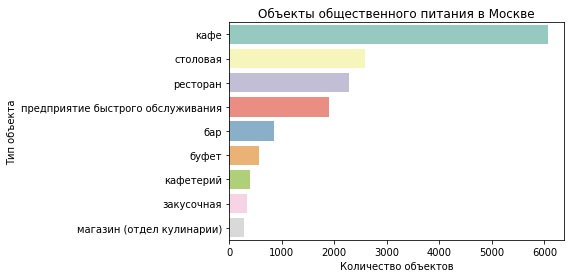

In [16]:
temp = rest_data.groupby('object_type').count().reset_index()
ax = sns.barplot(x='number', y='object_type', data=temp.sort_values
                 ('number', ascending=False), palette="Set3")
ax.set_title('Объекты общественного питания в Москве')
ax.set_xlabel('Количество объектов')
ax.set_ylabel('Тип объекта')
plt.show()

###### Вывод: 
- Из анализа соотношения видов объектов общественного питания к количеству выявлено, что наибольшее количество объектов кафе (6099), столовая (2587), ресторан (2285), наименьшее количество у закусочная (360) и магазина (отдел кулинарии) (273).

### Исследуем соотношение сетевых и несетевых заведений по количеству. Построим график.

In [17]:
rest_data['chain'] = rest_data['chain'].map({'нет':'несетевой','да':'сетевой'})
rest_data.groupby('chain')['object_name'].count().sort_values()

chain
сетевой       2964
несетевой    12317
Name: object_name, dtype: int64

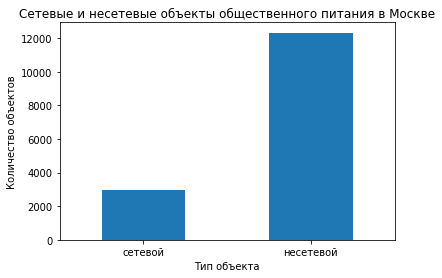

In [18]:
ax = rest_data.groupby('chain')['object_name'].count().sort_values().plot(kind='bar')
ax.set_title('Сетевые и несетевые объекты общественного питания в Москве')
ax.set_xlabel('Тип объекта')
ax.set_ylabel('Количество объектов')
plt.xticks(rotation=0)
plt.show()

###### Вывод: 
- Из анализа видно, что не сетевые заведения имеют подавляющее большинство объектов - 12 398, что составляет около 75 % от общего числа.

### Для какого вида объекта общественного питания характерно сетевое распространение?

In [19]:
rest_data.groupby(['object_type', 'chain']
    ).agg({'object_type': 'count'}
    ).rename(columns={'object_type': 'Тип объекта'})

Тип объекта
object_type                       chain                 
бар                               несетевой          818
                                  сетевой             37
буфет                             несетевой          565
                                  сетевой             11
закусочная                        несетевой          292
                                  сетевой             56
кафе                              несетевой         4675
                                  сетевой           1396
кафетерий                         несетевой          343
                                  сетевой             52
магазин (отдел кулинарии)         несетевой          195
                                  сетевой             78
предприятие быстрого обслуживания несетевой         1109
                                  сетевой            788
ресторан                          несетевой         1739
                                  сетевой            543
столовая                          несетевой         2581
                                  сетевой              3

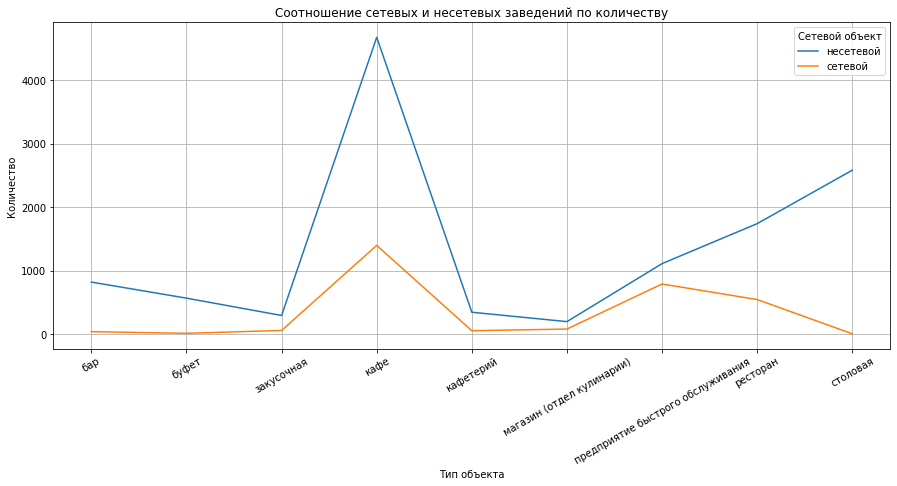

In [20]:
# Построим график соотношения сетевых и несетевых заведений по количеству
rest_data.rename(columns={'chain': 'Сетевой объект'}).pivot_table(
    index='object_type', columns='Сетевой объект', values='id', aggfunc='count'
    ).plot(grid=True, figsize=(15, 6))

plt.ylabel('Количество')
plt.xlabel('Тип объекта')
plt.title('Cоотношение сетевых и несетевых заведений по количеству')
plt.xticks(rotation = 30)
plt.show()

In [37]:
# Создадим сводную таблицу
rest_data_pivot = rest_data.pivot_table(index='object_type', values='id', columns='chain', aggfunc='count').reset_index()
rest_data_pivot['share_chain %'] = ((rest_data_pivot['сетевой'] / (rest_data_pivot['сетевой'] + rest_data_pivot['несетевой'])) * 100).round(2)
rest_data_pivot.drop(rest_data_pivot.columns[[1,2]], axis=1, inplace=True)
rest_data_pivot = rest_data_pivot.sort_values('share_chain %', ascending = False)

In [39]:
rest_data_pivot

chain,object_type,share_chain %
6,предприятие быстрого обслуживания,41.54
5,магазин (отдел кулинарии),28.57
7,ресторан,23.79
3,кафе,22.99
2,закусочная,16.09
4,кафетерий,13.16
0,бар,4.33
1,буфет,1.91
8,столовая,0.12


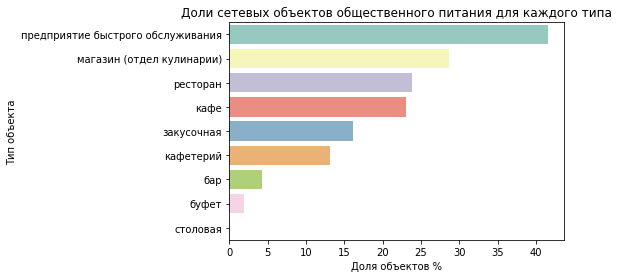

In [40]:
ax = sns.barplot(x='share_chain %', y='object_type', data=rest_data_pivot.sort_values('share_chain %', ascending=False), palette="Set3")
ax.set_title('Доли сетевых объектов общественного питания для каждого типа')
ax.set_xlabel('Доля объектов %')
ax.set_ylabel('Тип объекта')
plt.show()

###### Вывод: 
- Из анализа соотношения сетевых и несетевых заведений по количеству выявлено, что всего в датасете не сетевых заведений (12398) гораздо больше чем сетевых (2968). Среди сетевых лидируют типы объектов: предприятия быстрого обслуживания, магазины (кулинария), рестораны и кафе, очень мало сетевых баров и кафе, практически нет сетевых столовых

### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

Уточним количество сетевых объектов с разбивкой на типы заведений

In [70]:
data_number = rest_data.query("chain == 'да'")
data_number = data_number.groupby('object_type').agg({'id':'count', 'number':'mean'}).round(0)
data_number.columns = ['Кол-во объектов', 'Среднее число посадочных мест']

In [72]:
data_number

,Кол-во объектов,Среднее число посадочных мест
object_type,,
бар,37,53.0
буфет,11,13.0
закусочная,56,14.0
кафе,1396,47.0
кафетерий,52,12.0
магазин (отдел кулинарии),78,9.0
предприятие быстрого обслуживания,791,40.0
ресторан,544,100.0
столовая,3,112.0


Построим график

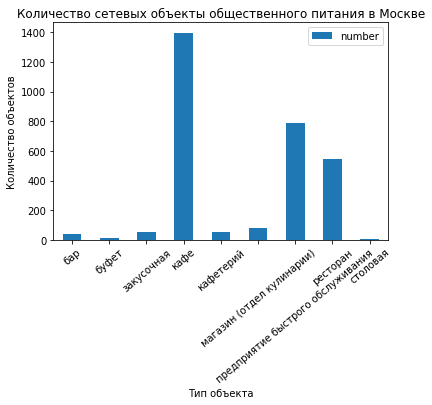

In [73]:
ax = rest_data.query('chain == "да"').pivot_table(index='object_type', values='number', aggfunc='count').plot(kind='bar')
ax.set_title('Количество сетевых объекты общественного питания в Москве')
ax.set_xlabel('Тип объекта')
ax.set_ylabel('Количество объектов')
plt.xticks(rotation=40)
plt.show()

Определим максимальное количество посадочных мест в сетевых заведениях.

In [ ]:
rest_data.query('chain == "да"')['number'].max()

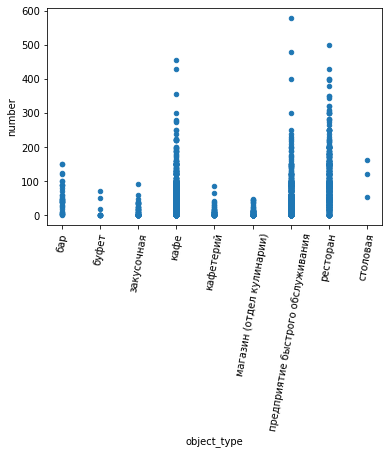

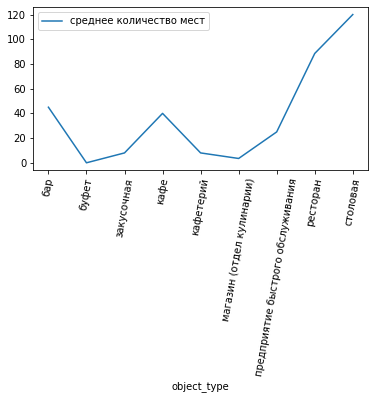

In [74]:
# Выполним срез только для сетевых заведений
rest = rest_data.query('chain == "да"')
# Построим диаграмму рассеяния для сетевых заведений по типам заведений
rest.sort_values(by='object_type', ascending=True).plot(kind='scatter', x='object_type', y='number')
plt.xticks(rotation = 80)
# Построим кривую средних значений посадочных мест по типам заведений
rest.rename(columns={'number': 'среднее количество мест'}).sort_values(by='object_type', ascending=False
    ).pivot_table(index='object_type', values='среднее количество мест', aggfunc='median'
    ).plot(grid=False, figsize=(6, 3))
plt.xticks(rotation = 80)
plt.show()

Найдем среднее количество посадочных мест

In [75]:
rest_data.query('chain == "да"')['number'].median()

40.0

In [85]:
# Выделим сетевые заведения, сгруппируем данные по заведениям и найдем среднее количество посадочных мест и количество заведений. Затем построим график.
# chain_object = rest_data.query('chain == "да"')
chain_group =  rest_data.groupby('object_name').agg({'id': 'count', 'number' : 'mean'}).sort_values(by = 'id', ascending = False)
fig = px.scatter(chain_group, x="id", y="number",color="number", color_continuous_scale=px.colors.sequential.Viridis,
                 render_mode="webgl", width=600, height=600)
fig.show()

###### Вывод: 
- Рассматривая кривую средних значений в совокупности с диаграммой рассеяния видно, что большинство типов заведений (кроме ресторана и столовой) имеют среднюю величину мест от 10 до 40 и подавляющее преимущество количество посадочных мест ниже указанных средних величин. 
- Также общая средняя величина количества посадочных мест для всех сетевых заведений равна 40.
- Из анализа полученных результатов можно сделать вывод, что для сетевых заведений наиболее характерно много заведений с небольшим числом посадочных мест в каждом, чем  мало заведений с большим количеством посадочных мест

### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики

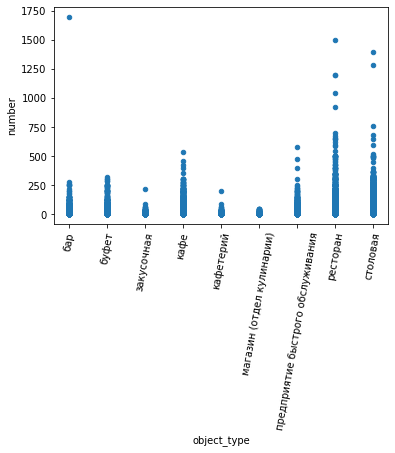

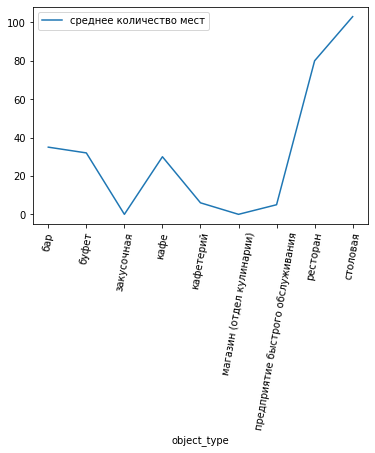

In [88]:
# Построим диаграмму рассеяния для сетевых заведений по типам заведений
rest_data.sort_values(by='object_type', ascending=True).plot(kind='scatter', x='object_type', y='number')
plt.xticks(rotation = 80)
# Построим кривую средних значений посадочных мест по типам заведений
rest_data.rename(columns={'number': 'среднее количество мест'}).sort_values(by='object_type', ascending=False
    ).pivot_table(index='object_type', values='среднее количество мест', aggfunc='median'
    ).plot(grid=False, figsize=(6, 4))
plt.xticks(rotation = 80)
plt.show()

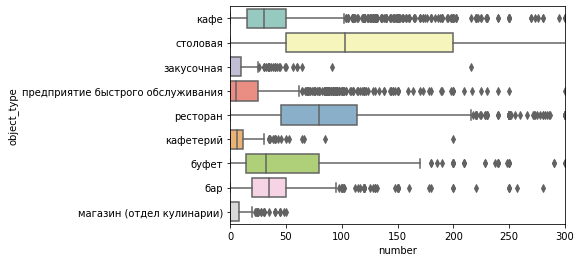

In [89]:
ax = sns.boxplot(x='number', y='object_type', data=rest_data, palette="Set3")
ax.set_xlim(0,300)
plt.show()

In [90]:
rest_data.groupby('object_type')['number'].describe().sort_values(by='50%', ascending = False)

,count,mean,std,min,25%,50%,75%,max
object_type,,,,,,,,
столовая,2587.0,130.246618,95.179313,0.0,50.0,103.0,200.0,1400.0
ресторан,2285.0,96.834136,94.756542,0.0,46.0,80.0,114.0,1500.0
бар,856.0,43.494159,67.082876,0.0,20.0,35.0,50.0,1700.0
буфет,585.0,51.129915,56.331974,0.0,14.0,32.0,80.0,320.0
кафе,6099.0,39.716019,37.720947,0.0,15.0,30.0,50.0,533.0
кафетерий,398.0,9.123116,14.639150,0.0,0.0,6.0,12.0,200.0
предприятие быстрого обслуживания,1923.0,20.552262,38.366974,0.0,0.0,5.0,25.0,580.0
закусочная,360.0,7.608333,16.650912,0.0,0.0,0.0,10.0,216.0
магазин (отдел кулинарии),273.0,5.589744,9.872729,0.0,0.0,0.0,8.0,50.0


### Вывод:
- Для каждого вида объекта постоили графики среднего количества посадочных мест и диаграмму рассеяния. Абсолютно максимально большое количество мест находится в баре - 1700, далее по уменьшению столовая и ресторан.
- По среднему количеству посадочных мест лидирует тип столовая - 103, далее ресторан - 80 и далее по убыванию бар - 35, буфет -32, кафе - 30, кафетерий - 6, закусочная и магазин имеют нулевую величину среднего количества мест.
- Столовая предоставляет в среднем самое большое количество посадочных мест - 103, к тому же общее число заведений данного типа большое - 2 587 шт. и сопоставимо с количеством ресторанов (2 285), кстати у ресторана также большое среднее количество мест - 80.

### Выделите в отдельный столбец информацию об улице из столбца address.

In [91]:
address = rest_data['address'].to_list()
streets = []
for street in address:  
    start = street.find('город москва')
    end = street.find('дом ')
    streets.append(street[start+14:end-2])
rest_data['street_name'] = streets
rest_data.head(10)

,id,object_name,chain,object_type,address,number,street_name
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240,Абрамцевская улица
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,переулок Сивцев Вражек
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90,Авиамоторная улица
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150,Авиамоторная улица
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120,Авиамоторная улица


### Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [92]:
top_10 = rest_data.groupby('street_name').count().sort_values(by='object_type', ascending=False).head(10).reset_index()
# top_10_str = list(top_10['street_name'])
top_10

,street_name,id,object_name,chain,object_type,address,number
0,проспект Мира,204,204,204,204,204,204
1,Профсоюзная улица,182,182,182,182,182,182
2,Ленинградский проспект,170,170,170,170,170,170
3,Пресненская набережная,167,167,167,167,167,167
4,Варшавское шоссе,155,155,155,155,155,155
5,Ленинский проспект,147,147,147,147,147,147
6,проспект Вернадского,131,131,131,131,131,131
7,Кутузовский проспект,114,114,114,114,114,114
8,Каширское шоссе,103,103,103,103,103,103
9,Кировоградская улица,102,102,102,102,102,102


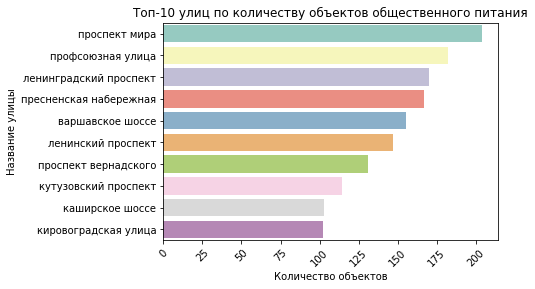

In [105]:
ax = sns.barplot(x='object_type', y='street_name', data=top_10, palette="Set3")
ax.set_title('Топ-10 улиц по количеству объектов общественного питания')
ax.set_xlabel('Количество объектов')
ax.set_ylabel('Название улицы')
plt.xticks(rotation=45)
plt.show()

Для того, чтобы узнать к каким районам принадлежат эти улицы, воспользуемся внешними данными

In [104]:
url='https://drive.google.com/file/d/1SZkIv849Vo7UR1DzCCRATL4d67M1RGA0/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
st = pd.read_csv(url, index_col= 0)
st.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [103]:
# приведем к единому регистру
st = st.rename(columns={'streetname':'street_name'})
st['street_name'] = st['street_name'].str.lower()
top_10['street_name'] = top_10['street_name'].str.lower()
top_10['street_name'] = top_10['street_name'].str.strip()

In [102]:
district = top_10.merge(st, on='street_name', how='left')
district = district.drop(['id', 'object_name', 'chain', 'object_type', 'address', 'number', 'areaid'],1)
district.head(25)

,street_name,okrug,area
0,проспект мира,СВАО,Алексеевский район
1,проспект мира,СВАО,Ярославский Район
2,проспект мира,СВАО,Район Марьина роща
3,проспект мира,СВАО,Останкинский район
4,проспект мира,СВАО,Район Ростокино
5,проспект мира,СВАО,Район Свиблово
6,проспект мира,ЦАО,Мещанский район
7,профсоюзная улица,ЮЗАО,Академический район
8,профсоюзная улица,ЮЗАО,Район Черемушки
9,профсоюзная улица,ЮЗАО,Район Ясенево


######  Вывод:  
- Топ 10 улиц располагаются в большом количестве районов и в разных частях города. Некоторые длинные улицы пересекают несколько районов, а иногда и несколько округов.

###  Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [100]:
# Сгруппируем данные с 1-м объектом общественного питания
one = rest_data.groupby('street_name').agg({'object_name': 'count'}).sort_values(by = 'object_name', ascending = False)
one = one.query('object_name == 1')
one = one.drop('object_name',1)
one = one.reset_index()
one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   street_name  812 non-null    object
dtypes: object(1)
memory usage: 6.5+ KB


In [101]:
#Добавим район и округ и удалим дубликаты
one['street_name'] = one['street_name'].str.strip()
one['street_name'] = one['street_name'].str.lower()
one = one.merge(st, on='street_name', how='left')
# one.head()
area_nunique = one['area'].drop_duplicates()
area_nunique = area_nunique.dropna()
len(area_nunique)

100

In [99]:
area_nunique.head(10)

1          Район Южное Тушино
5                Район Перово
6        Район Соколиная Гора
8             Бутырский район
11             Тверской район
27              Район Люблино
28      Район Выхино-Жулебино
49             Район Солнцево
52    Район Хорошево-Мневники
54           Район Сокольники
Name: area, dtype: object

###### Вывод:  
- Из анализа следует, что в Москве 812 улиц с одним объектом общественного питания, которые находятся в 100 районах города.

### Общий вывод:
- Список топ-10 мест в основном сконцентрирован в центре, поэтому приоритет различается по сравнению с таблицей по всей Москве. 
- Самые популярные форматы заведений: кафе, столовая и ресторан, притом кафе лидирует с большим отрывом, что логично, так как в центре больше дорогих мест. 
- Преобладают в основном несетевые заведения и занимают порядка 80% рынка.
- Большим количеством посадочных мест обладают столовые, рестораны и бары. Что касается среднего показателя, столовые и рестораны имеют самый высокий.
- Есть улицы с большим количеством объектов общественного питания, где нет посадочных мест.
- Наибольшее количество объектов питания расположены на крупных улицах города: Ленинградском проспекте, Просоюзной улице и проспекте Мира.
###### Рекомендации: 
- При планировании размещения кафе следует обратить внимание на центральную часть города (постоянный поток посетителей), в частности те улицы, где минимальное количество объектов общественного питания, а также улицы из списка топ-10 в одном районе.
- Формат для заведения лучше выбрать "кафе" с количеством посадочных мест 30-50.

## Подготовка презентации

Презентация исследования расположена по ссылке: https://disk.yandex.ru/i/33ouXBmEcG9P8Q